In [ ]:
# Update sklearn to prevent version mismatches
#!pip install sklearn --upgrade

In [ ]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
#!pip install joblib

In [1]:
# Import Dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier


# Read the CSV and Perform Basic Data Cleaning

In [2]:
df = pd.read_csv("../data/exoplanet_data.csv")

# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
pd.set_option('display.max_columns', None)

# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_teq,koi_insol,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,0.586,0.059,-0.443,4.50700,0.11600,-0.11600,874.8,35.5,-35.5,2.83,0.32,-0.19,443,9.11,2.87,-1.62,25.8,2,5455,81,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,-0.000581,0.969,5.126,-0.077,1.78220,0.03410,-0.03410,10829.0,171.0,-171.0,14.60,3.92,-1.31,638,39.30,31.04,-10.49,76.3,1,5853,158,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,1.276,0.115,-0.092,2.40641,0.00537,-0.00537,8079.2,12.8,-12.8,33.46,8.50,-2.83,1395,891.96,668.95,-230.35,505.6,1,5805,157,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,-0.001130,0.701,0.235,-0.478,1.65450,0.04200,-0.04200,603.3,16.9,-16.9,2.75,0.88,-0.35,1406,926.16,874.33,-314.24,40.9,1,6031,169,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,-0.001900,0.762,0.139,-0.532,3.14020,0.06730,-0.06730,686.0,18.7,-18.7,2.77,0.90,-0.30,1160,427.65,420.33,-136.70,40.2,2,6046,189,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6991 entries, 0 to 6990
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   koi_disposition    6991 non-null   object 
 1   koi_fpflag_nt      6991 non-null   int64  
 2   koi_fpflag_ss      6991 non-null   int64  
 3   koi_fpflag_co      6991 non-null   int64  
 4   koi_fpflag_ec      6991 non-null   int64  
 5   koi_period         6991 non-null   float64
 6   koi_period_err1    6991 non-null   float64
 7   koi_period_err2    6991 non-null   float64
 8   koi_time0bk        6991 non-null   float64
 9   koi_time0bk_err1   6991 non-null   float64
 10  koi_time0bk_err2   6991 non-null   float64
 11  koi_impact         6991 non-null   float64
 12  koi_impact_err1    6991 non-null   float64
 13  koi_impact_err2    6991 non-null   float64
 14  koi_duration       6991 non-null   float64
 15  koi_duration_err1  6991 non-null   float64
 16  koi_duration_err2  6991 

# Exploratory Data Analysis (EDA)

C:\Users\dave\anaconda3\envs\PythonAdv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='koi_disposition', ylabel='count'>

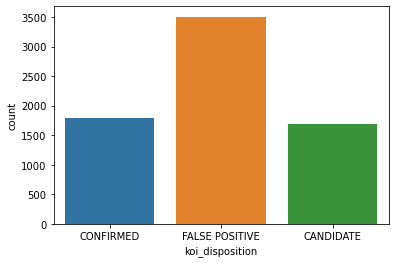

In [4]:
# univariate analysis target
sns.countplot(df['koi_disposition'])

# Select your features (columns)

In [5]:
# set features to be used as x values
# selected_features = df[['names', 'of', 'selected', 'features', 'here']]

selected_features = df
selected_features.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_teq,koi_insol,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,0.586,0.059,-0.443,4.50700,0.11600,-0.11600,874.8,35.5,-35.5,2.83,0.32,-0.19,443,9.11,2.87,-1.62,25.8,2,5455,81,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,-0.000581,0.969,5.126,-0.077,1.78220,0.03410,-0.03410,10829.0,171.0,-171.0,14.60,3.92,-1.31,638,39.30,31.04,-10.49,76.3,1,5853,158,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,1.276,0.115,-0.092,2.40641,0.00537,-0.00537,8079.2,12.8,-12.8,33.46,8.50,-2.83,1395,891.96,668.95,-230.35,505.6,1,5805,157,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,-0.001130,0.701,0.235,-0.478,1.65450,0.04200,-0.04200,603.3,16.9,-16.9,2.75,0.88,-0.35,1406,926.16,874.33,-314.24,40.9,1,6031,169,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,-0.001900,0.762,0.139,-0.532,3.14020,0.06730,-0.06730,686.0,18.7,-18.7,2.77,0.90,-0.30,1160,427.65,420.33,-136.70,40.2,2,6046,189,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


# Create a Train Test Split

Use `koi_disposition` for the y values

In [6]:
# assign X (data) and y (target)

X = df.drop("koi_disposition", axis=1)
y = df["koi_disposition"]

print(X.shape, y.shape)

(6991, 40) (6991,)


In [7]:
# split the data into training and testing

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [8]:
X_train.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_teq,koi_insol,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
6122,0,0,0,0,6.768901,7.380000e-05,-7.380000e-05,133.077240,0.008440,-0.008440,0.150,0.305,-0.150,3.61600,0.3060,-0.3060,123.1,13.2,-13.2,1.24,0.34,-0.23,1017,253.30,204.89,-103.87,10.8,1,5737,154,-171,4.327,0.153,-0.187,1.125,0.310,-0.207,294.40472,39.351681,14.725
6370,0,1,0,1,0.733726,6.060000e-06,-6.060000e-06,132.020050,0.007950,-0.007950,0.291,0.193,-0.291,2.30900,0.2820,-0.2820,114.6,9.3,-9.3,0.86,0.23,-0.06,1867,2891.64,2253.61,-677.78,13.8,1,5855,158,-175,4.578,0.033,-0.187,0.797,0.211,-0.056,284.50391,42.463860,15.770
2879,1,0,0,0,7.652707,6.540000e-05,-6.540000e-05,134.460380,0.006190,-0.006190,0.970,0.879,-0.942,79.89690,0.0000,0.0000,641.1,42.9,-42.9,3.21,0.97,-0.32,989,226.81,195.16,-64.34,254.3,1,6328,151,-189,4.481,0.050,-0.200,0.963,0.290,-0.097,295.50211,38.983540,13.099
107,0,0,0,0,7.953547,1.910000e-05,-1.910000e-05,174.662240,0.001820,-0.001820,0.300,0.145,-0.300,2.63120,0.0595,-0.0595,875.4,25.3,-25.3,2.25,0.07,-0.14,696,55.37,7.15,-10.12,38.4,1,4768,76,-85,4.536,0.056,-0.016,0.779,0.023,-0.049,291.15878,40.750271,15.660
29,0,0,0,0,4.959319,5.150000e-07,-5.150000e-07,172.258529,0.000083,-0.000083,0.831,0.016,-0.004,2.22739,0.0075,-0.0075,9802.0,20.0,-20.0,12.21,1.96,-1.46,1103,349.40,146.52,-93.21,696.5,1,5712,77,-77,4.359,0.110,-0.110,1.082,0.173,-0.130,292.16705,48.727589,15.263


# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [9]:
# create a MinMaxScaler model and fit it to the training data

from sklearn.preprocessing import MinMaxScaler

X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [10]:
X_test_scaled

array([[1.        , 0.        , 0.        , ..., 0.71935671, 0.78182436,
        0.7335317 ],
       [0.        , 0.        , 0.        , ..., 0.81490723, 0.65788966,
        0.67575833],
       [0.        , 0.        , 1.        , ..., 0.52590633, 0.93147304,
        0.74427639],
       ...,
       [0.        , 0.        , 0.        , ..., 0.69767242, 0.2535126 ,
        0.58550293],
       [0.        , 0.        , 0.        , ..., 0.67275473, 0.27116045,
        0.63294487],
       [0.        , 0.        , 0.        , ..., 0.56882006, 0.34870286,
        0.62269609]])

# K Nearest Neighbors



k: 1, Train/Test Score: 1.000/0.790
k: 51, Train/Test Score: 0.828/0.825
k: 101, Train/Test Score: 0.823/0.817
k: 151, Train/Test Score: 0.816/0.812
k: 201, Train/Test Score: 0.811/0.799
k: 251, Train/Test Score: 0.807/0.793
k: 301, Train/Test Score: 0.802/0.791
k: 351, Train/Test Score: 0.796/0.785
k: 401, Train/Test Score: 0.792/0.778
k: 451, Train/Test Score: 0.789/0.776
k: 501, Train/Test Score: 0.790/0.776
k: 551, Train/Test Score: 0.788/0.780
k: 601, Train/Test Score: 0.787/0.780
k: 651, Train/Test Score: 0.785/0.773
k: 701, Train/Test Score: 0.785/0.776
k: 751, Train/Test Score: 0.785/0.776
k: 801, Train/Test Score: 0.783/0.777
k: 851, Train/Test Score: 0.781/0.775
k: 901, Train/Test Score: 0.780/0.771
k: 951, Train/Test Score: 0.774/0.771


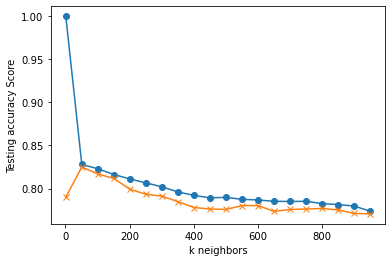

In [11]:
# KNN - K Nearest Neighbor classifier

from sklearn.neighbors import KNeighborsClassifier

# loop through different k values to see which has the highest accuracy
# use odd numbers only to eliminate any ties
train_scores = []
test_scores = []
for k in range(1, 1000, 50):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
plt.plot(range(1, 1000, 50), train_scores, marker='o')
plt.plot(range(1, 1000, 50), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [12]:
# k: 451 provides the best accuracy where the classifier starts to stablize
knn = KNeighborsClassifier(n_neighbors=451)
knn.fit(X_train_scaled, y_train)
print('k=451 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=451 Test Acc: 0.776


In [13]:
predictions = knn.predict(X_test_scaled)
print(predictions)

['FALSE POSITIVE' 'CONFIRMED' 'FALSE POSITIVE' ... 'CONFIRMED' 'CANDIDATE'
 'CONFIRMED']


In [14]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions))

                precision    recall  f1-score   support

     CANDIDATE       0.61      0.30      0.40       411
     CONFIRMED       0.58      0.84      0.69       484
FALSE POSITIVE       0.98      0.97      0.97       853

      accuracy                           0.78      1748
     macro avg       0.72      0.70      0.69      1748
  weighted avg       0.78      0.78      0.76      1748



# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [18]:
from sklearn.neighbors import KNeighborsClassifier

# making the instance
knn = KNeighborsClassifier(n_jobs=-1)

In [19]:
#Hyper Parameters Set
params = {'n_neighbors':[5,6,7,8,9,10],
          'leaf_size':[1,2,3,5],
          'weights':['uniform', 'distance'],
          'algorithm':['auto', 'ball_tree','kd_tree','brute'],
          'n_jobs':[-1]}

In [21]:
from sklearn.model_selection import GridSearchCV

# making models with hyper parameters sets
knn_grid = GridSearchCV(knn, param_grid=params, n_jobs=1)

In [22]:
# learning
knn_grid.fit(X_train_scaled, y_train)

GridSearchCV(estimator=KNeighborsClassifier(n_jobs=-1), n_jobs=1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [1, 2, 3, 5], 'n_jobs': [-1],
                         'n_neighbors': [5, 6, 7, 8, 9, 10],
                         'weights': ['uniform', 'distance']})

In [23]:
# the best hyper parameters set
print("Best Hyper Parameters:\n",knn_grid.best_params_)

Best Hyper Parameters:
 {'algorithm': 'auto', 'leaf_size': 1, 'n_jobs': -1, 'n_neighbors': 10, 'weights': 'distance'}


In [24]:
# prediction
prediction=knn_grid.predict(X_test_scaled)

In [25]:
from sklearn import metrics

# evaluation(Accuracy)
print("GridSearchCV Accuracy:", metrics.accuracy_score(prediction,y_test))

GridSearchCV Accuracy: 0.8283752860411899


In [26]:
from sklearn.metrics import classification_report

print(classification_report(y_test, prediction))

                precision    recall  f1-score   support

     CANDIDATE       0.68      0.57      0.62       411
     CONFIRMED       0.68      0.75      0.71       484
FALSE POSITIVE       0.98      1.00      0.99       853

      accuracy                           0.83      1748
     macro avg       0.78      0.77      0.77      1748
  weighted avg       0.83      0.83      0.83      1748



# Save the Model

In [28]:
# saving model

import joblib

filename = 'KNN_model.sav'
joblib.dump(knn_grid, filename)

['KNN_model.sav']